## Data Exploration
1. Load the data
2. Examining Data: Use methods like `.head()`, `.tail()`, .`info()`, and `.describe()` to get an initial understanding of the data, including its structure, data types, and summary statistics

#### About the datasets:
`Speed monitoring Cologne`
- Dataset: Recorded fines of urban speed enforcement in Cologne from 2017
- Data includes: Year, month, incident date, incident time, location abbreviation, speed, exceeding amount, vehicle type, office, and location abbreviation
- Focus on speed and red light violations captured by the security and traffic service's data collection
- Does not include speed reports from the police
- Provides information on vehicle types
- Separate location tables available for speed measuring locations
- Sourced from the Open Data Portal of Cologne
- Data available in CSV format

`Cologne Weather History`
- Dataset: Cologne Weather History for the duration of 2000-01-01 to 2021-12-31
- Data contains information about various weather parameters in Cologne
- Features include: Ground Temperature 5 cm under ground in °Celsius, Wind speed in m/sec, Precipitation height in mm (rain intensity), Sunshine in minutes per hour, Air temperature in °Celsius, Relative humidity in %
- Data is available in CSV format
- Metadata and data can be accessed through the provided URLs
- Sourced from Kaggle dataset repository

#### Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

#### Loading Data

In [2]:
conn = sqlite3.connect('../data/data.sqlite')
speed_data = pd.read_sql_query("SELECT * FROM data_speed", conn)
weather_data = pd.read_sql_query("SELECT * FROM data_weather", conn)
conn.close()

#### Display the first few rows of the dataframes

The `.head()` method in pandas is used to display the first few rows of a DataFrame. By default, it returns the first five rows, but you can specify the number of rows to display within the parentheses

#### `Before renaming`

In [3]:
speed_data.head()

,jahr,monat,vorfallsdatum,vorfallsuhrzeit,Kennz,geschwindigkeit,ueberschreitung,fahrzeugart,dienststelle,standort
0,2017,1,10117,28,KL-,46,13,04a,None,40
1,2017,1,10117,255,-87,49,16,04a,None,40
2,2017,1,10117,437,K-,39,6,04a,None,40
3,2017,1,10117,650,K-,42,9,04a,None,40
4,2017,1,10117,933,SG-,73,10,04a,None,972


In the provided code snippet, you are renaming the columns of a DataFrame called speed_data. The rename() function is used to change the names of columns in a DataFrame

In [4]:
speed_data.rename(columns={
    'jahr': 'year',
    'monat': 'month',
    'vorfallsdatum': 'incident_date',
    'vorfallsuhrzeit': 'incident_time',
    'Kennz': 'location_license_plate',
    'geschwindigkeit': 'speed',
    'ueberschreitung': 'exceeding',
    'fahrzeugart': 'vehicle_type',
    'dienststelle': 'office',
    'standort': 'incident_location'
}, inplace=True)

#### `After Renaming`

In [5]:
speed_data.head()

,year,month,incident_date,incident_time,location_license_plate,speed,exceeding,vehicle_type,office,incident_location
0,2017,1,10117,28,KL-,46,13,04a,None,40
1,2017,1,10117,255,-87,49,16,04a,None,40
2,2017,1,10117,437,K-,39,6,04a,None,40
3,2017,1,10117,650,K-,42,9,04a,None,40
4,2017,1,10117,933,SG-,73,10,04a,None,972


#### `Before renaming`

In [6]:
weather_data.head()

,Unnamed: 0,GroundTempCelsius,WindSpeedMeterPerSec,PrecipitationHeightMillimeter,SunshineMinutes,AirTempCelsius,RelHumidityPercent
0,2000-01-01 00:00:00,NaN,2.7,0.0,NaN,3.8,85.0
1,2000-01-01 01:00:00,NaN,2.0,0.0,NaN,3.8,85.0
2,2000-01-01 02:00:00,NaN,2.3,0.0,NaN,3.6,89.0
3,2000-01-01 03:00:00,NaN,2.0,0.0,0.0,3.6,90.0
4,2000-01-01 04:00:00,NaN,2.6,0.0,0.0,3.7,89.0


In [7]:
weather_data.rename(columns={
    'Unnamed: 0': 'date_time'}, inplace = True)

#### `After Renaming`

In [8]:
weather_data.head()

,date_time,GroundTempCelsius,WindSpeedMeterPerSec,PrecipitationHeightMillimeter,SunshineMinutes,AirTempCelsius,RelHumidityPercent
0,2000-01-01 00:00:00,NaN,2.7,0.0,NaN,3.8,85.0
1,2000-01-01 01:00:00,NaN,2.0,0.0,NaN,3.8,85.0
2,2000-01-01 02:00:00,NaN,2.3,0.0,NaN,3.6,89.0
3,2000-01-01 03:00:00,NaN,2.0,0.0,0.0,3.6,90.0
4,2000-01-01 04:00:00,NaN,2.6,0.0,0.0,3.7,89.0


#### Check the shape of the dataframes

The `.shape` attribute in pandas is used to determine the dimensions of a DataFrame or a NumPy array. It returns a tuple that represents the number of rows and columns in the dataset

- The first value represents the number of rows in the DataFrame.
- The second value represents the number of columns in the DataFrame

In [9]:
print("Shape of speed_data:", speed_data.shape)
print("Shape of weather_data:", weather_data.shape)

Shape of speed_data: (3454540, 10)
Shape of weather_data: (192864, 7)


#### Basic information about the data

The `.info()` method in pandas provides a concise summary of the DataFrame, including the total number of entries, column names, data types, and memory usage. It gives you a quick overview of the dataset's structure and allows you to identify potential issues or inconsistencies

- The number of rows and columns in the DataFrame
- The column names and their corresponding data types
- The count of non-null values in each column
- The total memory usage of the DataFrame

In [10]:
speed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454540 entries, 0 to 3454539
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   year                    int64 
 1   month                   int64 
 2   incident_date           int64 
 3   incident_time           int64 
 4   location_license_plate  object
 5   speed                   object
 6   exceeding               object
 7   vehicle_type            object
 8   office                  object
 9   incident_location       int64 
dtypes: int64(5), object(5)
memory usage: 263.6+ MB


### `Bar Chart`

- The bar chart represents the average incident count per month from 2017 to 2022
- The chart provides an overview of the average incident frequency throughout the observed period
- The x-axis represents the months, ranging from January to December.
- The y-axis indicates the average incident count, representing the typical number of incidents that occurred in a given month.
- The chart allows for a visual comparison of the average incident counts across different months.
- It showcases any seasonal or monthly patterns in incident occurrence.
- The bar chart helps identify months with higher or lower incident counts, enabling further investigation into potential factors influencing incident frequency

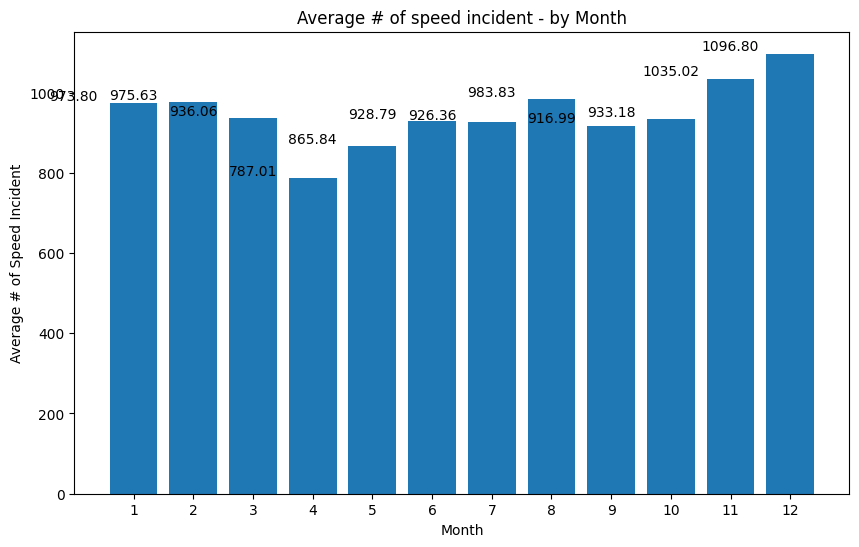

In [11]:
import matplotlib.pyplot as plt

# Calculate the average incident count per month
average_counts = speed_data.groupby('month')['incident_location'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_counts.index, average_counts.values)
plt.xlabel('Month')
plt.ylabel('Average # of Speed Incident')
plt.title('Average # of speed incident - by Month')
plt.xticks(average_counts.index)

# Display the value for each bar
for i, value in enumerate(average_counts.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


In [12]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192864 entries, 0 to 192863
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date_time                      192864 non-null  object 
 1   GroundTempCelsius              181244 non-null  float64
 2   WindSpeedMeterPerSec           192685 non-null  float64
 3   PrecipitationHeightMillimeter  192641 non-null  float64
 4   SunshineMinutes                144262 non-null  float64
 5   AirTempCelsius                 192864 non-null  float64
 6   RelHumidityPercent             192860 non-null  float64
dtypes: float64(6), object(1)
memory usage: 10.3+ MB


### `Describe()`

The describe() method in pandas is used to generate descriptive statistics of a DataFrame or Series. When applied to a DataFrame, it provides a summary of the central tendency, dispersion, and shape of the distribution of each numerical column in the DataFrame.

In [13]:
weather_data.describe()

,GroundTempCelsius,WindSpeedMeterPerSec,PrecipitationHeightMillimeter,SunshineMinutes,AirTempCelsius,RelHumidityPercent
count,181244.000000,192685.000000,192641.000000,144262.000000,192864.000000,192860.000000
mean,12.295538,3.218732,0.089737,14.598176,10.950416,76.174220
std,8.479410,1.694187,0.520861,22.611096,7.453838,17.569492
min,-7.400000,0.000000,0.000000,0.000000,-18.900000,12.000000
25%,5.400000,1.900000,0.000000,0.000000,5.500000,65.000000
50%,11.400000,2.900000,0.000000,0.000000,10.800000,80.000000
75%,18.200000,4.200000,0.000000,27.000000,16.200000,90.000000
max,46.200000,15.800000,43.500000,60.000000,39.600000,100.000000


- The dataset contains weather data has 192,864 entries
- The average ground temperature is 12.30°C, with a standard deviation of 8.48°C
- Wind speeds range from 0 to 15.8 meters per second, with an average of 3.22 meters per second
- Precipitation heights vary from 0 to 43.5 millimeters, with an average of 0.09 millimeters
- The average duration of sunshine is 14.60 minutes, with a maximum of 60 minutes
- Air temperatures range from -7.4°C to 39.6°C, with an average of 10.95°C
- Relative humidity levels range from 12% to 100%, with an average of 76.17%

#### Chek for missing values:
Handled in the 'report.ipynb'

In [14]:
print("Missing values in speed_data:")
print(speed_data.isnull().sum())

print("\nMissing values in weather_data:")
print(weather_data.isnull().sum())

Missing values in speed_data:
year                           0
month                          0
incident_date                  0
incident_time                  0
location_license_plate     58612
speed                          0
exceeding                      1
vehicle_type                   0
office                    551096
incident_location              0
dtype: int64

Missing values in weather_data:
date_time                            0
GroundTempCelsius                11620
WindSpeedMeterPerSec               179
PrecipitationHeightMillimeter      223
SunshineMinutes                  48602
AirTempCelsius                       0
RelHumidityPercent                   4
dtype: int64


___

___

### Refer `report.ipynb` file for data cleaning and the usecase details